TASK 1 : Dataset Selection

In [25]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [87]:
df_AS = pd.read_csv('ontario_public_library_statistics_2022_open_data.csv', encoding='ISO-8859-1')
df_AS.head()
# Display the first few rows of the dataset



,Library Full Name,Library Number,Survey Year From,A1.3 Ontario Library Service (OLS) Region (English),A1.4 Type of Library Service (English),A1.5 Mailing Address,A1.9 Street Address,A1.10 City/Town,A1.11 Province,A1.12 Postal Code,...,H1.9.1.T Yes,H1.9.2.51 Chamber of Commerce,H1.9.2.52 Business Improvement Area (BIA),H1.9.2.95 Other Business and Economic Sector Partnerships,H1.9.3 Please provide highlights or examples of your librarys partnerships with the business and economic sector:,P1.1 Resident Population Served,P1.2 Contracting Population Served,P2.1 Contracting Households Served,P2.2 Resident Households Served,Unnamed: 328
0,Addington Highlands Twp,L0005,2022,Southern Ontario Library Service,Public or Union Library,3641 Flinton Rd. Box 72,3641 Flinton Rd.,Flinton,Ontario,K0H1P0,...,0,0,0,0,0,"1,712",0,0,"2,762",0
1,Adjala-TosorontioTwp,L0003,2022,Southern Ontario Library Service,Contracting Municipality,7855 Sideroad 30 R.R. #1,7855 Sideroad 30 R.R. #1,Alliston,Ontario,L9R1V1,...,0,0,0,0,0,"10,975",0,0,"4,103",0
2,Admaston/Bromley Twp,L0002,2022,Southern Ontario Library Service,Public or Union Library,Hwy 60 P O Box 130,5346 Highway 60,Douglas,Ontario,K0J1S0,...,0,0,0,0,0,"2,935",0,0,"1,408",0
3,Ajax,L0032,2022,Southern Ontario Library Service,Public or Union Library,55 Harwood Avenue South,55 Harwood Avenue South,Ajax,Ontario,L1S2H8,...,1,0,0,2,0,"127,400",0,0,"38,400",0
4,Alberton Twp,L1098,2022,Ontario Library Service - North,Contracting Municipality,3 Highway 611 South RR1B2,3 Highway 611 South RR1B2,Township of Alberton,Ontario,P9A3M2,...,0,0,0,0,0,969,0,0,373,0


Task 2: Data Exploration with Python


Data Types:
Library Full Name                                      object
Library Number                                         object
Survey Year From                                        int64
A1.3 Ontario Library Service (OLS) Region (English)    object
A1.4 Type of Library Service (English)                 object
                                                        ...  
P1.1  Resident Population Served                       object
P1.2  Contracting Population Served                    object
P2.1  Contracting Households Served                    object
P2.2  Resident Households Served                       object
Unnamed: 328                                            int64
Length: 329, dtype: object
       Survey Year From  C0.4.F  French Special Collections - Original Format  \
count             364.0                                         364.000000      
mean             2022.0                                           5.711538      
std                 0.0            

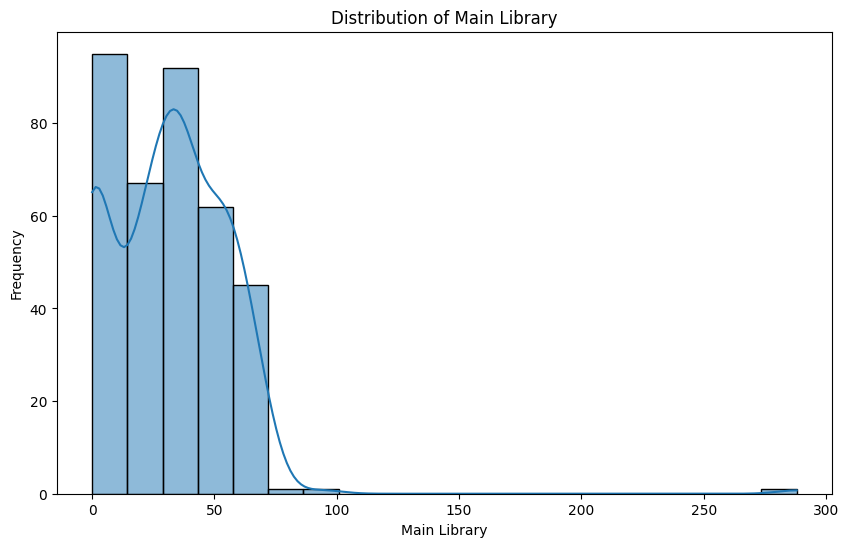

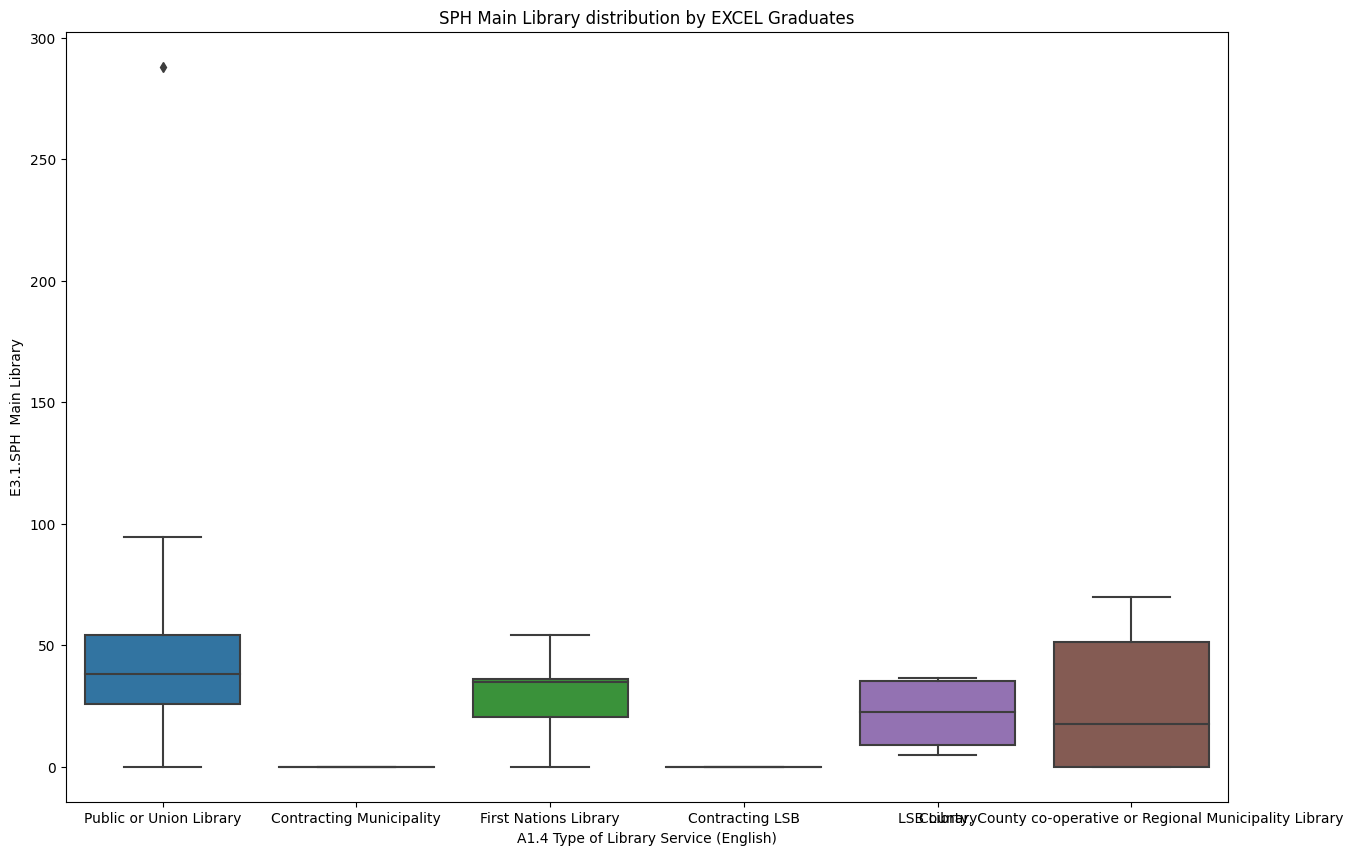

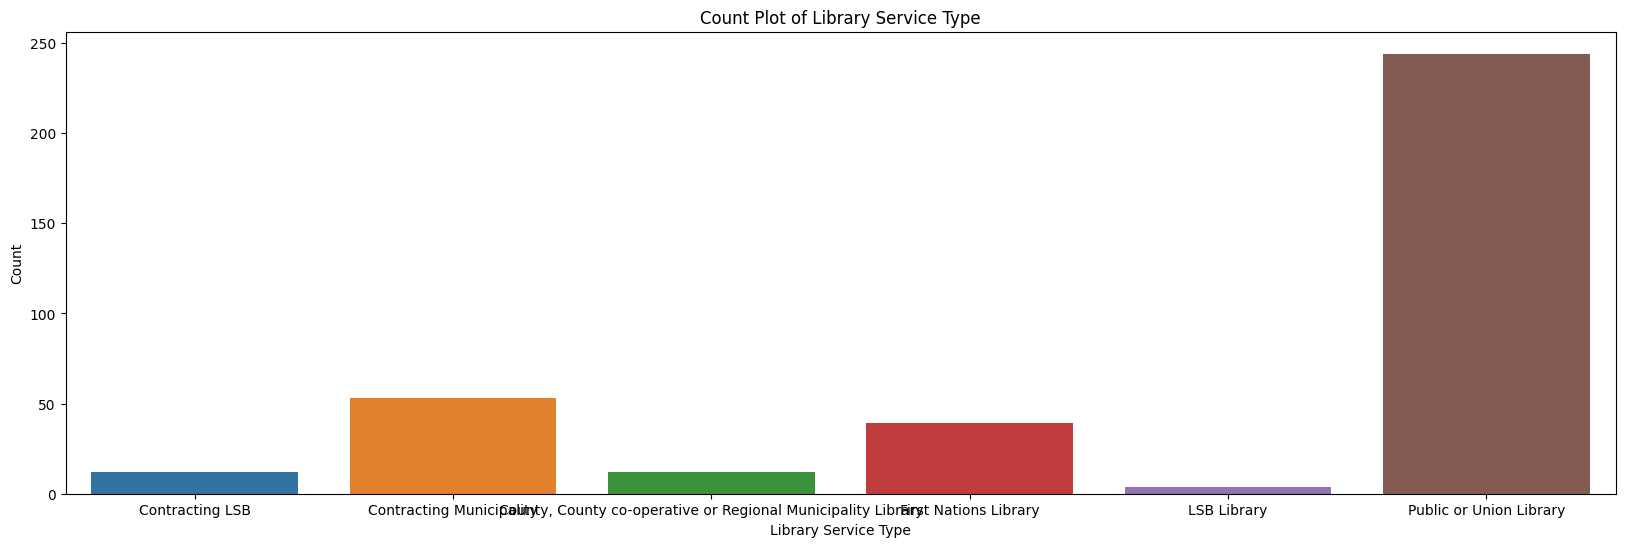

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Data types of each column
data_types = df_AS.dtypes
print("\nData Types:")
print(data_types)
# Get summary statistics of the numerical columns
print(df_AS.describe())

# Data Visualization
# Plot a histogram of a numerical column
df_AS['E3.1.SPH  Main Library'] = df_AS['E3.1.SPH  Main Library'].replace(',', '', regex=True).astype(float)

plt.figure(figsize=(10, 6))
sns.histplot(df_AS['E3.1.SPH  Main Library'], bins=20, kde=True)
plt.title('Distribution of Main Library')
plt.xlabel('Main Library')
plt.ylabel('Frequency')
plt.show()

# Visualization - SPH Main Library distribution by Type of Library services
plt.figure(figsize=(15, 10))
sns.boxplot(y='E3.1.SPH  Main Library', x='A1.4 Type of Library Service (English)', data=df_AS)
plt.title('SPH Main Library distribution by EXCEL Graduates')
plt.ylabel('E3.1.SPH  Main Library')
plt.xlabel('A1.4 Type of Library Service (English)')
plt.show()

# Convert the column to a categorical data type
df_AS['A1.4 Type of Library Service (English)'] = df_AS['A1.4 Type of Library Service (English)'].astype('category')

# Plot a count plot of the categorical column
plt.figure(figsize=(20, 6))
sns.countplot(data=df_AS, x='A1.4 Type of Library Service (English)')
plt.title('Count Plot of Library Service Type')
plt.xlabel('Library Service Type')
plt.ylabel('Count')
plt.show()




Task 3: Data Preprocessing with Python

In [82]:
# Check for missing values
missing_values = df_AS.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
Library Full Name                                      0
Library Number                                         0
Survey Year From                                       0
A1.3 Ontario Library Service (OLS) Region (English)    0
A1.4 Type of Library Service (English)                 0
                                                      ..
P1.1  Resident Population Served                       0
P1.2  Contracting Population Served                    0
P2.1  Contracting Households Served                    0
P2.2  Resident Households Served                       0
Unnamed: 328                                           0
Length: 329, dtype: int64


4: Implement Machine Learning Models with Python

In [83]:
from scipy.stats import zscore

# Calculate the Z-score for numeric columns
z_scores = df_AS.select_dtypes(include=['int64', 'float64']).apply(zscore)

# Define a threshold for outliers (e.g., Z-score > 3 or < -3)
outlier_threshold = 3

# Remove rows with outlier values for each numeric column
df_no_outliers = df_AS[(z_scores.abs() < outlier_threshold).all(axis=1)]

In [99]:


# Example: Perform one-hot encoding for a categorical variable
df = pd.get_dummies(df_AS, columns=['A1.4 Type of Library Service (English)'])

# Example: Apply log transformation on a skewed numeric feature
import numpy as np
df_AS['log_transformed_column'] = np.log(df_AS['E3.1.SPH  Main Library'] + 1)



In [96]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Titanic dataset
df_AS = pd.read_csv('ontario_public_library_statistics_2022_open_data.csv', encoding='ISO-8859-1')

# Separate features and target variable
X = df_AS.drop('log_transformed_column', axis=1)
y = df_AS['log_transformed_column']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 1. Support Vector Machine (SVM) Classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Predict using SVM model
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM model
print("Support Vector Machine (SVM) Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

# 2. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict using Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


KeyError: "['log_transformed_column'] not found in axis"